In [83]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#from tensorflow import keras
from tensorflow.keras.datasets import mnist


(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print ("packs loaded")
print('TF Version = {0:s}'.format(tf.__version__))

packs loaded
TF Version = 2.1.0


In [84]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


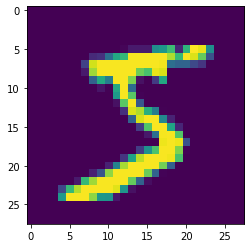

In [85]:
# What does the data of MNIST look like? 
plt.figure()
plt.imshow(X_train[0])
plt.show()

How does the training data look like?


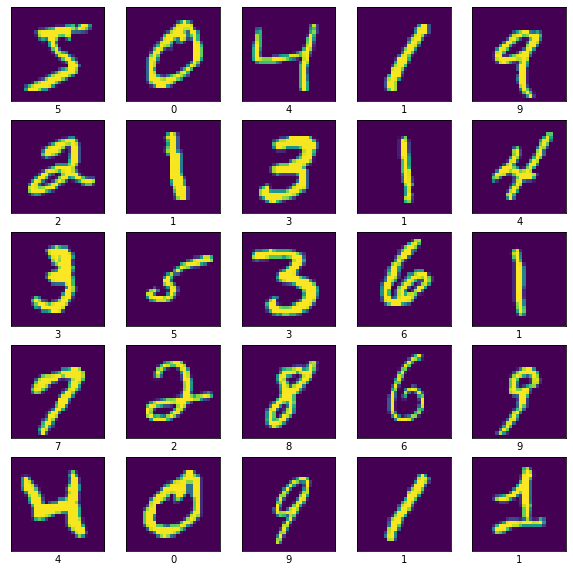

In [86]:
# How does the training data look like?
print ("How does the training data look like?")
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(Y_train[i])
plt.show()

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               1606144   
___________________________________________

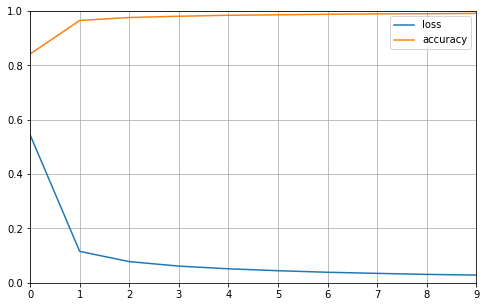

In [87]:
# 下面我们开始搭建模型。这里我们使用tensorflow2.0 的keras
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
'''
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))
print(X_train.shape)
print(X_test.shape)

#归一化
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)
print(X_test.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,kernel_size=(5 ,5),strides = 1, padding = "same",activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2), padding="same"),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(5 ,5), padding = "same",activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2), padding="same"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='sgd',#随机梯度下降和动量优化
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.summary() # 打印模型信息

# history记录模型训练过程中的一些值
#history = model.fit(X_train, Y_train, epochs=10, batch_size=64)
history = model.fit(X_train, Y_train, epochs=10)

# 将history中的数据以图片表示出来
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0,1)
plt.show()

In [88]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.0293 - accuracy: 0.9902


[0.029319374266196973, 0.9902]